In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("downloads/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [8]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


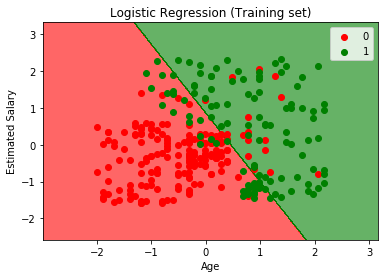

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


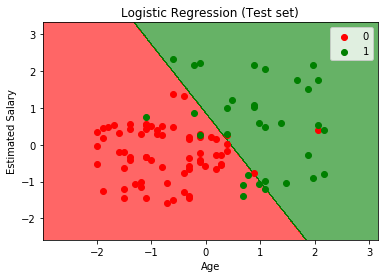

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


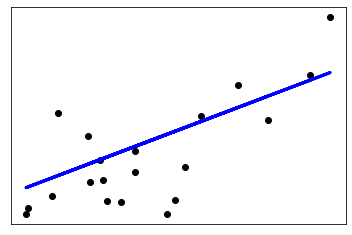

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
import pandas as pd
df = {"Number of Hours Spent Driving (X)":[10,9,2,15,10,16,11,16],"Risk Score on a scale of 0-100 (Y)":[95,80,10,50,45,98,38,93]}

In [3]:
df = pd.DataFrame(df)
df

,Number of Hours Spent Driving (X),Risk Score on a scale of 0-100 (Y)
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [30]:
# from sklearn.model_selection import train_test_split

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


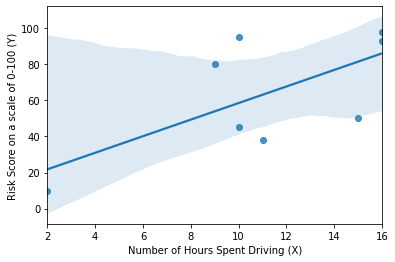

In [4]:
x = df[['Number of Hours Spent Driving (X)']]
y = df[['Risk Score on a scale of 0-100 (Y)']]

import seaborn as sns
sns.regplot(df['Number of Hours Spent Driving (X)'],df['Risk Score on a scale of 0-100 (Y)'])
# x_train,x_test,y_train,y_test =  train_test_split(x, y, test_size=0.50, random_state=42)

In [7]:
x_train

NameError: name 'x_train' is not defined

In [78]:
x_test

,Number of Hours Spent Driving (X)
1,9
5,16
0,10
7,16


In [79]:
y_train

,Risk Score on a scale of 0-100 (Y)
2,10
4,45
3,50
6,38


In [80]:
y_test

,Risk Score on a scale of 0-100 (Y)
1,80
5,98
0,95
7,93


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [22]:
y_pred = lr.predict([[0.2]])

In [23]:
y_pred

array([[13.50220769]])

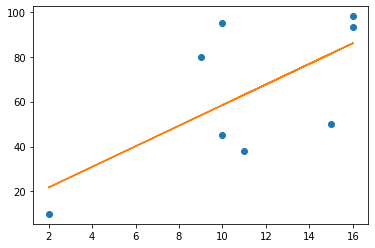

In [33]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(x,lr.predict(x))

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


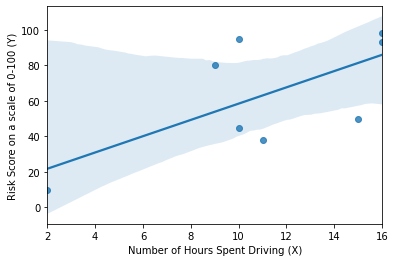

In [32]:
import seaborn as sns
sns.regplot(df['Number of Hours Spent Driving (X)'],df['Risk Score on a scale of 0-100 (Y)'])

In [1]:
# from sklearn.metrics import mean_squared_error, r2_score
# print('Coefficients: \n', lr.coef_)
# print('Intercept: \n', lr.intercept_)
# print("Mean squared error: %.2f"
#       % mean_squared_error(y_test, y_pred))
# print('Variance score: %.2f' % r2_score(y_test,y_pred))

# # Plot outputs
# plt.scatter(x_test,y_test,  color='black')
# plt.plot(x_test,y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [ ]:
import seaborn as sns

sns.regplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

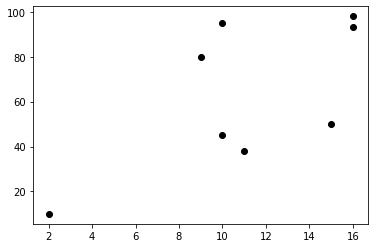

In [75]:
x = df[['Number of Hours Spent Driving (X)']]
y = df[['Risk Score on a scale of 0-100 (Y)']]

plt.scatter(df['Number of Hours Spent Driving (X)'],df['Risk Score on a scale of 0-100 (Y)'],  color='black')
# plt.plot(x_test,y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

### Second Program

In [34]:
import pandas as pd
df = pd.read_csv("F:\pyqt5\Billing System\main.csv",sep = "\t")

In [35]:
df

,AGE,INCOME,Gender,Maritial,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [36]:
x = df.iloc[:,:-1]

In [37]:
x
#input Independent

,AGE,INCOME,Gender,Maritial
0,<21,High,Male,Single
1,<21,High,Male,Married
2,21-35,High,Male,Single
3,>35,Medium,Male,Single
4,>35,Low,Female,Single
5,>35,Low,Female,Married
6,21-35,Low,Female,Married
7,<21,Medium,Male,Single
8,<21,Low,Female,Married
9,>35,Medium,Female,Single


In [39]:
y = df['Buys'].values

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
l_x = LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)

In [125]:
x

,AGE,INCOME,Gender,Maritial
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [43]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x.iloc[:,0:5],y)

DecisionTreeClassifier()

In [56]:
import numpy as np
x_in = np.array([1,0,1,1])

In [57]:
y_pred = DTC.predict([x_in])

In [58]:
y_pred

array(['No'], dtype=object)

<IPython.core.display.Javascript object>

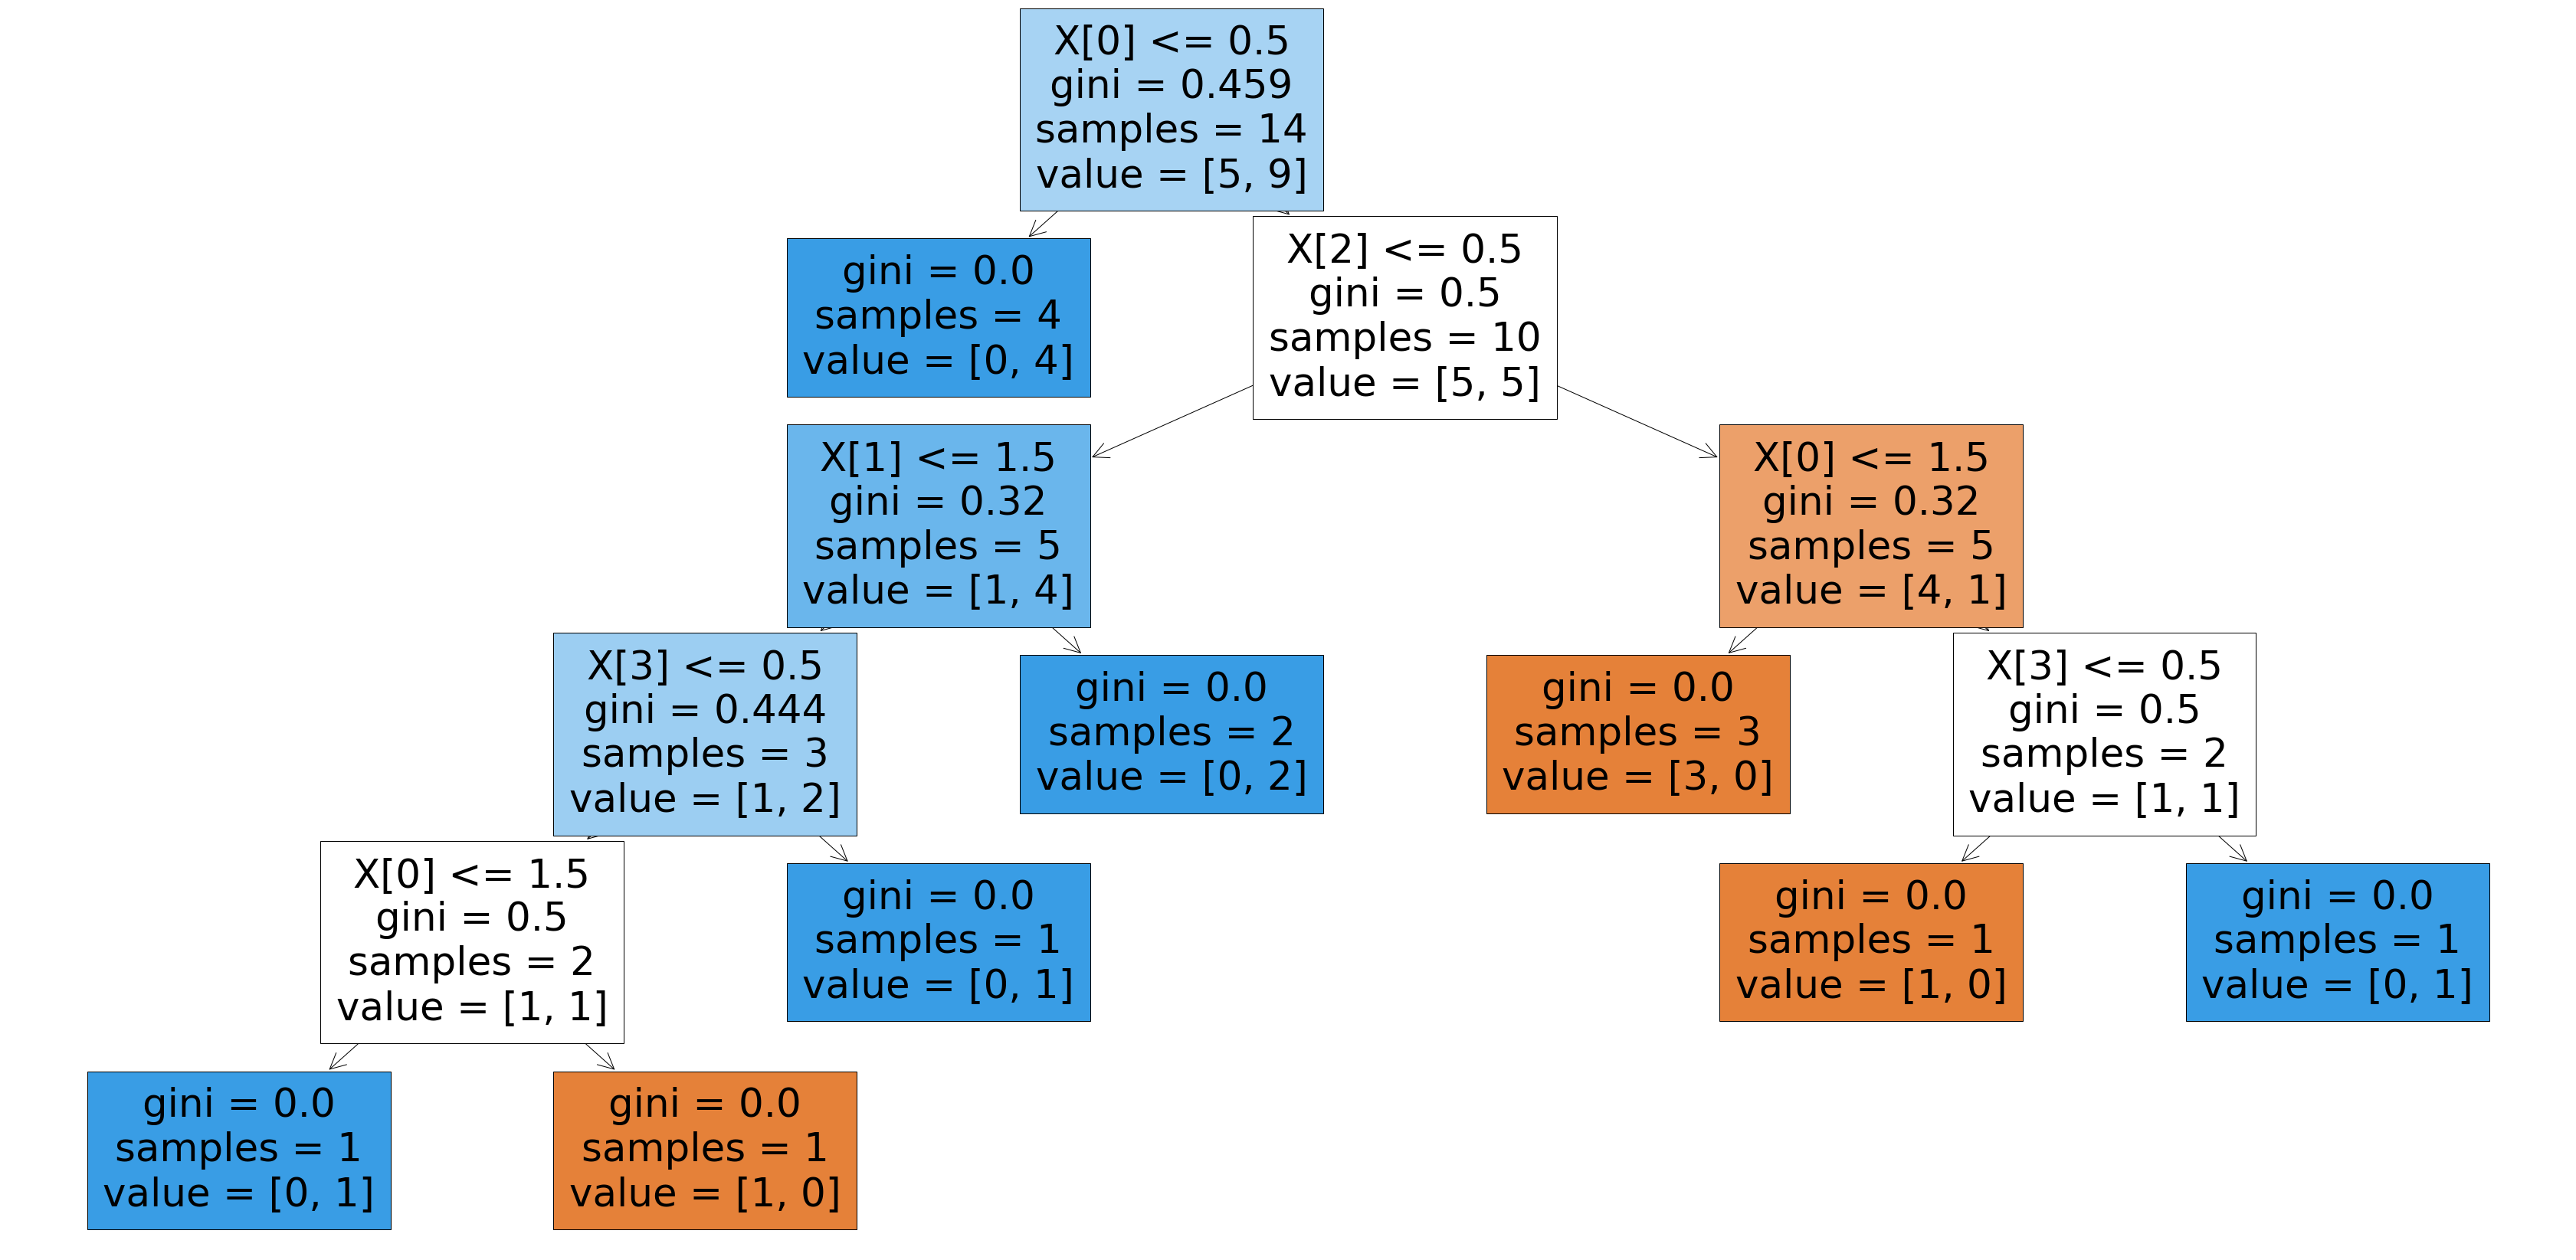

In [130]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(DTC, filled=True);

## Third Program

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df = pd.read_csv("F:\pyqt5\Billing System\main2.csv",sep = "\t")

In [61]:
df

,x,y,class
0,2,4,Negative
1,4,6,Negative
2,4,4,Positive
3,4,2,Negative
4,6,4,Negative
5,6,2,Positive


In [62]:
x = df.iloc[:,:-1]

In [63]:
y = df.iloc[:,-1]

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [65]:
model = knn.fit(x,y)

In [156]:
y_pred = [[2,4]]
print("Prediction: ",model.predict(y_pred))

Prediction:  ['Negative']


In [66]:
knn1 = KNeighborsClassifier(n_neighbors=3, weights='distance')
model1 = knn1.fit(x,y)

In [158]:
print("Distance : ",model1.predict(y_pred))

Distance :  ['Negative']


<IPython.core.display.Javascript object>

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


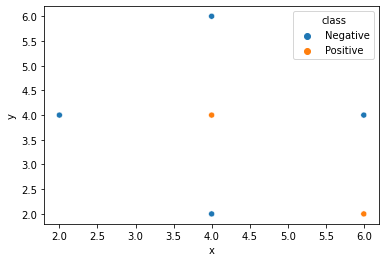

In [140]:
 sns.scatterplot(df['x'],df['y'],hue =df['class'])

## Fourth Program

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
X = np.array([[0.1,0.6], [0.15,0.71], [0.08,0.9], [0.16,0.85], [0.2,0.3], [0.25,0.5], [0.24,0.1], [0.3,0.2],])

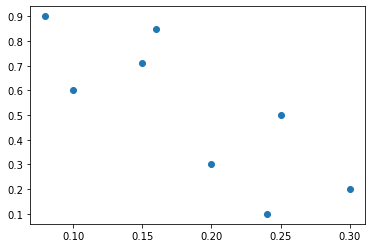

In [69]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [70]:
centroids = np.array([X[0], X[7]])

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1)
model = kmeans.fit(X)

In [73]:
kmeans.cluster_centers_

array([[0.148     , 0.712     ],
       [0.24666667, 0.2       ]])

In [74]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 1, 1])

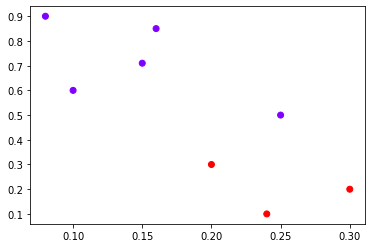

In [75]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()